In [1]:
import os
import math
import pandas as pd
import numpy as np
import sklearn
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss, acf, grangercausalitytests
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import wordcloud

In [2]:
sns.set(rc={'figure.figsize':(11, 4)})

In [3]:
os.chdir(r"C:\Users\Pohlmann\Documents\FGV\8º Semestre\OTCC/")

In [4]:
dirs = ['Data/','Data_Legitimate/']

In [5]:
# lendo os arquivos
dic = {}
for direc in dirs:
    print(direc)
    files = os.listdir(direc)
    dic[direc] = {}
    for file in files:
        cfile = pd.read_csv(direc+file, index_col=0, header=0, sep=',')
        cfile.rename(columns={cfile.columns[0]: file[:-4]}, inplace=True)
        dic[direc][file[:-4]] = cfile

Data/
Data_Legitimate/


In [6]:
# criando dataframes
prt = pd.concat(dic['Data/'], axis=1, ignore_index=False, sort=True)
lgt = pd.concat(dic['Data_Legitimate/'], axis=1, ignore_index=False, sort=True)

In [7]:
# organizando colunas
prt.columns = prt.columns.droplevel(0)
lgt.columns = lgt.columns.droplevel(0)

In [8]:
prt.describe().sort_values(by='mean', axis=1, ascending=False).columns[:10]

Index(['utorrentcom', 'thepiratebayorg', 'superflixnet', 'vizertv',
       'seuseriadocom', 'snaptubeappcom', 'assistirseriadosnet',
       'animesonlinecc', 'viatorrentscom', 'goyabucom'],
      dtype='object')

In [9]:
prt.index = pd.to_datetime(prt.index)
lgt.index = pd.to_datetime(lgt.index)

In [10]:
# as bases de dados começam no início de 2017
prt = prt.loc['2017-02-01':'2020-10-30']
lgt = lgt.loc['2017-02-01':]

In [11]:
prt.describe().sort_values(by='mean', axis=1, ascending=False)
# estatísticas básicas dos sites piratas

,utorrentcom,superflixnet,thepiratebayorg,vizertv,seuseriadocom,assistirseriadosnet,animesonlinecc,viatorrentscom,snaptubeappcom,goyabucom,...,askflixnet,xilftensite,thepiratefilmesonlinepro,megaserieshdonline,redecanaisblog,alphamancoachcom,filmeseriesonlinehdorg,overflixvip,filmeshdtop,tugastreamclub
count,1.368000e+03,1.368000e+03,1.368000e+03,1.368000e+03,1368.000000,1.368000e+03,1.368000e+03,1.368000e+03,1368.000000,1.368000e+03,...,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000,1368.000000
mean,1.422499e+06,1.245146e+06,1.175270e+06,4.769613e+05,459530.393422,4.541377e+05,4.484172e+05,4.474519e+05,443915.971580,3.482241e+05,...,2573.676678,1412.996552,1362.160187,1344.023833,1318.372030,902.599583,712.804497,257.972132,247.113732,60.147268
std,1.311989e+05,8.300944e+05,3.520659e+05,3.408549e+05,65199.797832,3.218354e+05,7.779182e+05,7.943574e+05,143074.590429,4.498011e+05,...,5576.513461,7200.078347,3995.997180,4379.683066,9231.767413,6726.526019,3956.204397,1456.035906,1733.514742,224.277244
min,8.060442e+05,0.000000e+00,1.580593e+03,0.000000e+00,24024.944127,2.000000e-06,3.450000e-04,7.210000e-03,65215.720679,2.190700e-02,...,0.000000,0.000000,0.000573,0.000000,0.000000,0.000000,0.000000,0.000240,0.004034,0.000000
25%,1.328407e+06,9.172623e+05,9.779898e+05,1.418891e+05,432347.716078,2.153035e+05,6.440000e-04,7.210000e-03,349609.555789,2.190700e-02,...,0.000000,0.000000,0.000573,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,0.000000
50%,1.413784e+06,1.250325e+06,1.267152e+06,5.354237e+05,448713.696171,3.570125e+05,6.440000e-04,7.210000e-03,456480.078611,2.190700e-02,...,0.000000,0.000000,0.000573,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,1.138207
75%,1.528657e+06,1.925716e+06,1.501495e+06,6.220241e+05,500654.948462,7.321472e+05,5.134453e+05,4.569541e+05,506943.188842,5.422795e+05,...,0.000000,0.000000,0.000573,0.000000,0.000000,0.000000,0.000000,0.000240,0.005167,13.110225
max,1.691182e+06,2.797214e+06,1.537225e+06,1.289074e+06,666599.645353,1.140551e+06,2.893356e+06,2.552613e+06,945275.207550,1.489549e+06,...,19488.919115,64281.369419,19442.334318,40196.252849,149339.058626,86329.925139,48954.705065,19856.124457,19717.938344,1540.744330


In [51]:
d = {}
for col in prt.describe().columns:
    d[col] = prt.describe()[col].loc['mean']

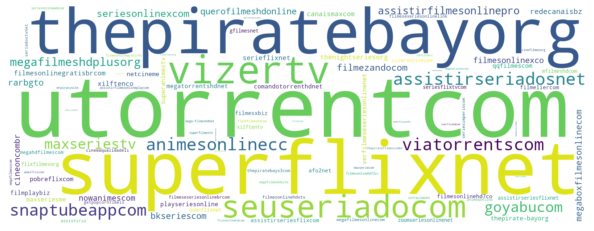

In [56]:
wc = wordcloud.WordCloud(background_color='white', width = 1600, height=600)
wc.generate_from_frequencies(frequencies=d)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

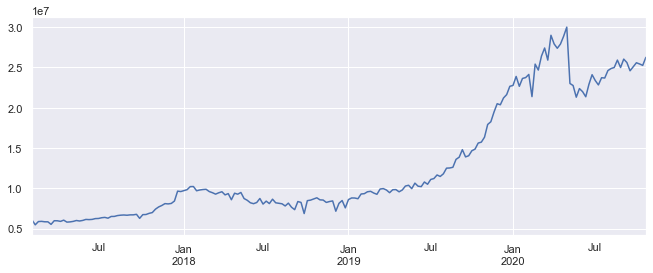

In [12]:
prt.asfreq('w').sum(axis=1).plot()

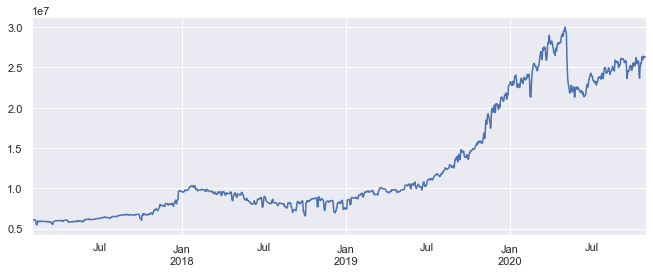

In [13]:
prt.sum(axis=1).plot()
# período diário introduz muita variabilidade, usar período semanal para ficar mais simples

In [14]:
lgt.describe().sort_values(by='mean', axis=1, ascending=False)
# estatísticas básicas dos sites legítimos

,netflixcom,globoplayglobocom,primevideocom,telecineplaycombr,crunchyrollcom,nowonlinecombr,vikicom,hbogocombr,lookecombr,hulucom,playpluscom,mubicom,oldflixcombr
count,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1.369000e+03,1369.000000,1369.000000,1.369000e+03,1369.000000,1369.000000,1369.000000,1369.000000
mean,3.588332e+07,1.611941e+07,1.774042e+06,1.716750e+06,1.196773e+06,9.706536e+05,450331.631863,416318.724651,3.312325e+05,51415.686671,38689.873025,31171.762835,18429.508417
std,1.683163e+06,4.504879e+06,6.036334e+05,1.333981e+06,7.185432e+05,3.297178e+05,63570.663007,72781.790576,3.097796e+05,8764.848345,39657.913189,4355.316879,10141.472226
min,5.431268e+06,8.822731e+06,6.322595e+05,1.566342e+03,2.476668e+05,2.816799e+05,259363.988342,5862.510940,5.581662e+04,7748.439799,447.274600,10223.773021,9205.931829
25%,3.496587e+07,1.166358e+07,1.231690e+06,5.458741e+05,5.013023e+05,6.958844e+05,417823.218286,423584.079971,7.349789e+04,45012.638190,1329.020000,28120.288950,10959.243030
50%,3.605410e+07,1.722262e+07,1.717757e+06,1.321324e+06,7.916921e+05,8.859373e+05,444800.488311,431615.855736,1.794850e+05,53114.030656,1470.762567,29479.763358,15579.196223
75%,3.647190e+07,1.887552e+07,2.383533e+06,2.964409e+06,1.938306e+06,1.196756e+06,509237.990517,439852.056674,5.652467e+05,56732.413403,79836.801009,33812.164061,20589.918010
max,3.905315e+07,2.733926e+07,4.648665e+06,4.381903e+06,2.534630e+06,2.089467e+06,560040.816419,488592.922424,1.920085e+06,106390.730147,119666.773263,42210.173491,62818.529100


In [65]:
dl = {}
for col in lgt.describe().columns:
    dl[col] = lgt.describe()[col].loc['mean']

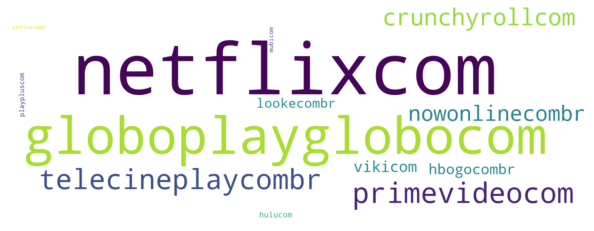

In [67]:
wcl = wordcloud.WordCloud(background_color='white', width = 1600, height=600)
wcl.generate_from_frequencies(frequencies=dl)
plt.figure()
plt.imshow(wcl, interpolation="bilinear")
plt.axis('off')
plt.show()

### Herfindahl-Hirschmann


In [71]:
pr = prt['2020-01-01':].describe().loc['mean']
lg = lgt['2020-01-01':].describe().loc['mean']

In [76]:
# IHH Pirata
np.sum([(value/np.sum(pr))**2 for value in pr])

0.0327607823633129

In [78]:
# IHH Legit
np.sum([(value/np.sum(lg))**2 for value in lg])

0.403787668145908

### Time Series

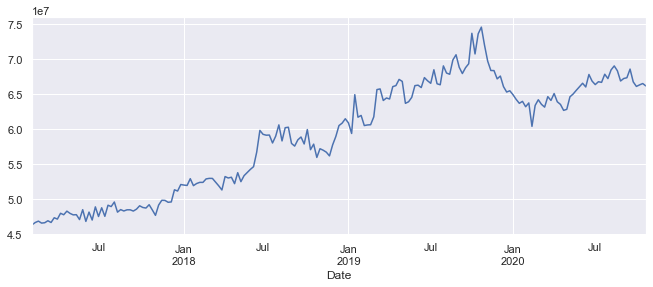

In [15]:
lgt.asfreq('w').sum(axis=1).plot()

In [16]:
totals = pd.DataFrame(prt.asfreq('w').sum(axis=1),columns=['Pirataria']).join(pd.DataFrame(lgt.asfreq('w').sum(axis=1),columns=['Legitimo']))

In [17]:
totals.cov()

,Pirataria,Legitimo
Pirataria,5.108010e+13,3.771887e+13
Legitimo,3.771887e+13,6.172803e+13


In [18]:
totals.corr(method='pearson')

,Pirataria,Legitimo
Pirataria,1.000000,0.671725
Legitimo,0.671725,1.000000


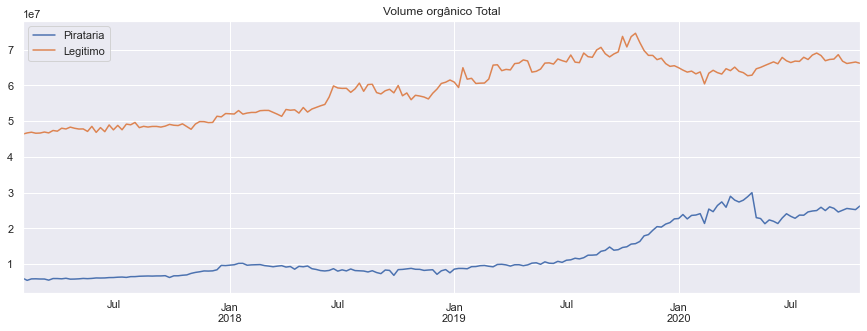

In [48]:
totals.plot(title='Volume orgânico Total', figsize=(15,5))

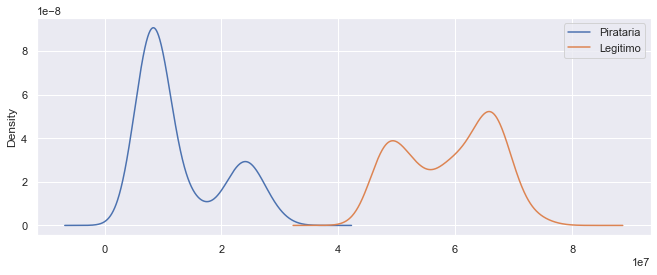

In [20]:
totals.plot(kind='kde')
plt.show()

In [21]:
# dividindo as séries em componentes Tendência, Sazonal e Residual
dec_p = seasonal_decompose(totals.Pirataria)
dec_l = seasonal_decompose(totals.Legitimo)

In [22]:
# separando sazonalidades
df_seasonal = totals.apply(lambda x: seasonal_decompose(x, model='additive').seasonal)
df_trend = totals.apply(lambda x: seasonal_decompose(x, model='additive').trend)

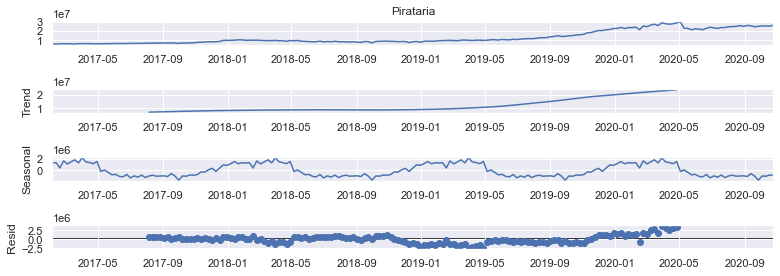

In [81]:
dec_p.plot()
plt.show()

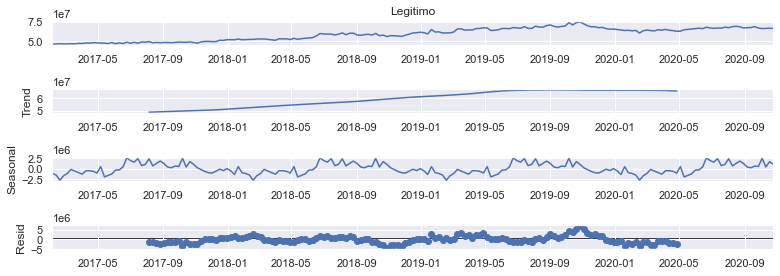

In [24]:
dec_l.plot()
plt.show()

## Sazonalidade

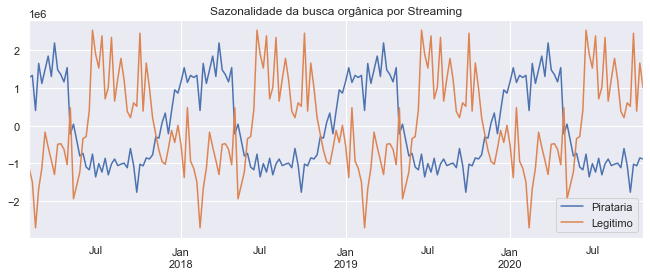

In [25]:
# O componente Sazonal mostra que Pirataria tende a aumentar nos períodos de baixa pela busca de serviços legítimos
# Os períodos da troca entre os dois se alinha com as datas em que as grandes redes de televisão pausam os lançamentos
# de suas principais séries para ainda ter conteúdos novos no início do ano seguinte e manter a atenção da audiência
# https://www.indiewire.com/2014/12/december-tv-why-midseason-winter-finales-make-shows-better-67252/
# https://www.theguardian.com/tv-and-radio/2014/nov/20/scandal-winter-finale-manipulation-on-demand-tv
df_seasonal.plot(title='Sazonalidade da busca orgânica por Streaming')
plt.show()

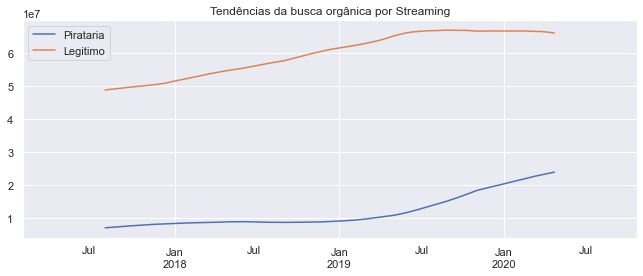

In [26]:
df_trend.plot(title='Tendências da busca orgânica por Streaming')
plt.show()

### Auto Correlação

https://towardsdatascience.com/time-series-analysis-with-theory-plots-and-code-part-2-c72b447da634

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


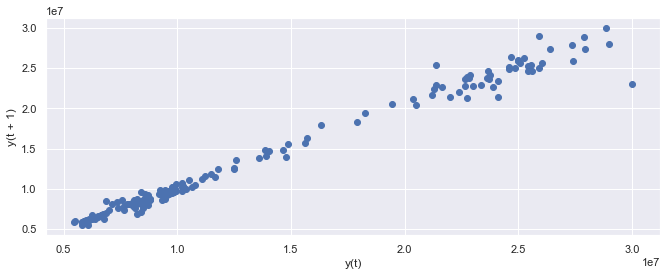

In [27]:
# estes gráficos mostram que o dia anterior à medição tem alta relação com seu valor hoje
pd.plotting.lag_plot(totals.Pirataria)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


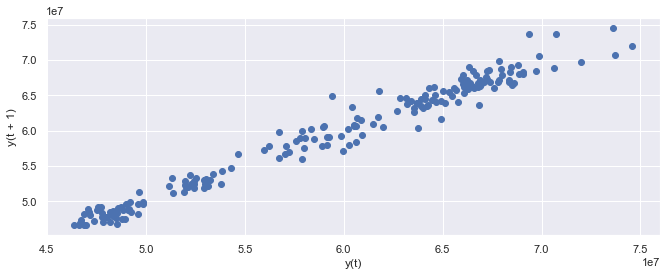

In [28]:
pd.plotting.lag_plot(totals.Legitimo)

C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


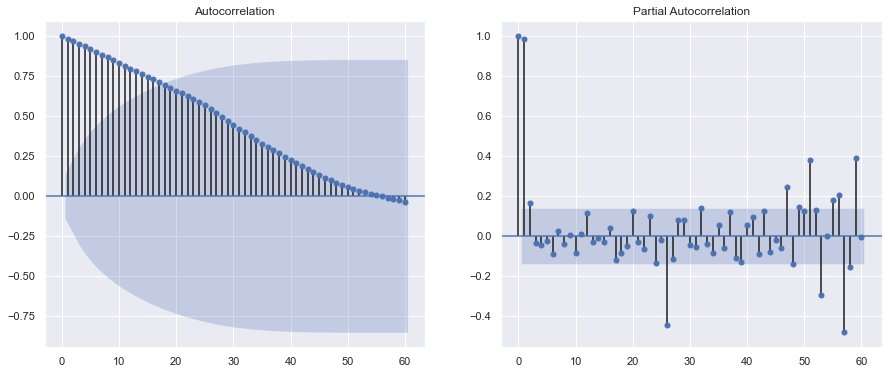

In [29]:
# autocorrelação mostra como valores anteriores de uma série interferem no seu resultado agora
# nestes gráficos vemos que, quanto mais antigos os valores, menos eles representam no valor atual
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(totals.Pirataria, nlags=60) # just the numbers
plot_acf(totals.Pirataria.tolist(), lags=60, ax=ax[0]); # just the plot
plot_pacf(totals.Pirataria.tolist(), lags=60, ax=ax[1]); # just the plot

C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


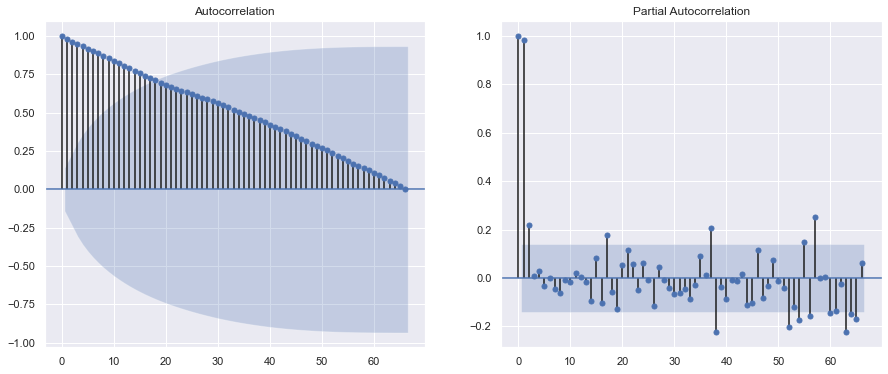

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(15, 6))
autocorr = acf(totals.Legitimo, nlags=66) # just the numbers
plot_acf(totals.Legitimo.tolist(), lags=66, ax=ax[0]); # just the plot
plot_pacf(totals.Legitimo.tolist(), lags=66, ax=ax[1]); # just the plot

# SARIMAX

https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

In [31]:
train = totals.loc[:'2020-06-30']
test = totals.loc['2020-06-30':]

In [32]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return math.sqrt(((actual- predicted)**2).mean())

### Pirataria

In [33]:
model = SARIMAX(train.Pirataria, order=(2, 0, 3), seasonal_order=(2, 0, 3, 52), trend='ct')

In [34]:
model_fit = model.fit()

C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [35]:
yhat = model_fit.forecast(17)

In [46]:
measure_rmse(train.Pirataria,model_fit.predict())

839436.9620226633

In [36]:
measure_rmse(test.Pirataria,yhat)

871788.5211712228

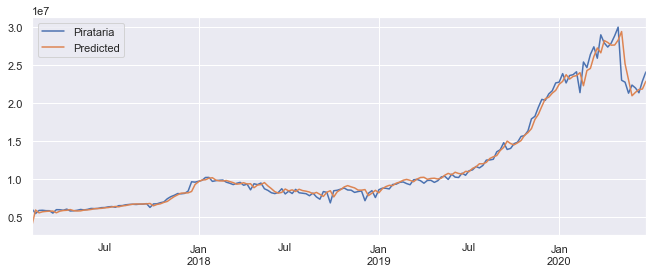

In [89]:
pd.DataFrame(train.Pirataria,columns=['Pirataria']).join(pd.DataFrame(model_fit.predict(),columns=['Predicted'])).plot() # shit, maybe predict was better than forecast for testing

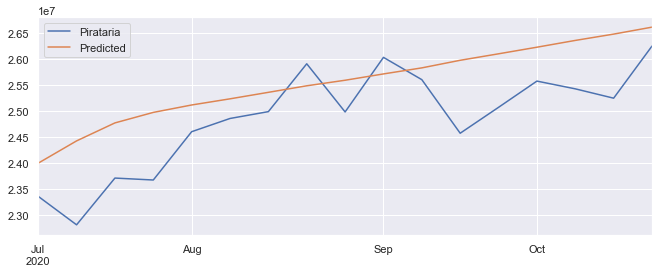

In [37]:
pd.DataFrame(test.Pirataria,columns=['Pirataria']).join(pd.DataFrame(yhat,columns=['Predicted'])).plot()

In [90]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Pirataria   No. Observations:                  178
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 52)   Log Likelihood               -2679.209
Date:                            Thu, 19 Nov 2020   AIC                           5384.417
Time:                                    23:36:01   BIC                           5425.780
Sample:                                02-05-2017   HQIC                          5401.191
                                     - 06-28-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.275e+04     36.977   1426.585      0.000    5.27e+04    5.28e+04
drift       4166.9678   3754.075      1.110      0.267   -3190.885    1.15e+04
ar.L1          1.2941      0.499      2.594      0.009       0.316       2.272
ar.L2         -0.3333      0.477     -0.698      0.485      -1.269       0.602
ma.L1         -0.6113      0.500     -1.223      0.221      -1.591       0.368
ma.L2          0.2084      0.159      1.308      0.191      -0.104       0.521
ma.L3          0.0940      0.088      1.064      0.287      -0.079       0.267
ar.S.L52      -0.1741      1.162     -0.150      0.881      -2.452       2.104
ar.S.L104      0.8088      1.285      0.630      0.529      -1.709       3.327
ma.S.L52       0.1566      1.242      0.126      0.900      -2.278       2.591
ma.S.L104     -0.8079      1.464     -0.552      0.581      -3.678       2.062
ma.S.L156      0.0124      0.636      0.020      0.984      -1.233       1.258
sigma2      7.334e+11   5.08e-05   1.44e+16      0.000    7.33e+11    7.33e+11
===================================================================================
Ljung-Box (Q):                       41.68   Jarque-Bera (JB):              3285.80
Prob(Q):                              0.40   Prob(JB):                         0.00
Heteroskedasticity (H):              23.95   Skew:                            -2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        23.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.3e+31. Standard errors may be unstable.
"""

In [91]:
predict = model_fit.get_prediction()
forecast = model_fit.get_forecast(15+26)

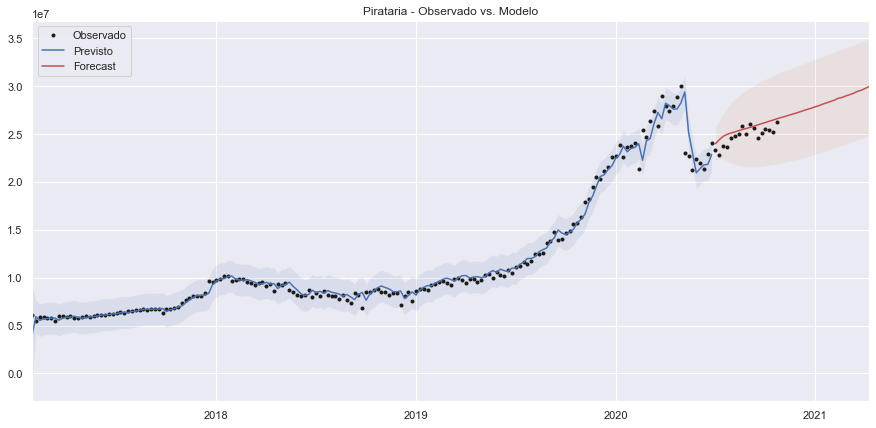

In [122]:
fig, ax = plt.subplots(figsize=(15,7))

totals.Pirataria.plot(ax=ax, style='k.',label='Observado')
predict.predicted_mean.plot(ax=ax, label='Previsto')
predict_ci = predict.summary_frame()
ax.fill_between(predict_ci.index, predict_ci['mean_ci_lower'], predict_ci['mean_ci_upper'], alpha=0.1)

forecast.predicted_mean.plot(ax=ax, style='r', label='Forecast')
frame = forecast.summary_frame()
ax.fill_between(frame.index,frame['mean_ci_lower'],frame['mean_ci_upper'], alpha=0.1)

# Cleanup the image
legend = ax.legend(loc='upper left')
title = ax.set_title('Pirataria - Observado vs. Modelo')

### Legitimos

In [38]:
model_l = SARIMAX(train.Legitimo, order=(2, 0, 3), seasonal_order=(2, 0, 3, 52), trend='ct')
model_fit_l = model_l.fit()
yhat_l = model_fit_l.forecast(17)

C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
C:\Users\Pohlmann\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


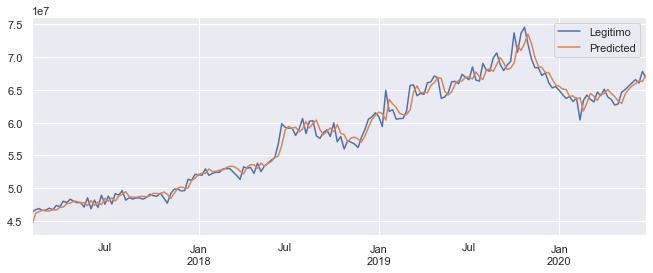

In [39]:
pd.DataFrame(train.Legitimo,columns=['Legitimo']).join(pd.DataFrame(model_fit_l.predict(),columns=['Predicted'])).plot() # shit, maybe predict was better than forecast for testing

In [40]:
measure_rmse(train.Legitimo,model_fit_l.predict())

1225986.9100816438

In [41]:
measure_rmse(test.Legitimo,yhat_l)

1053474.6696607163

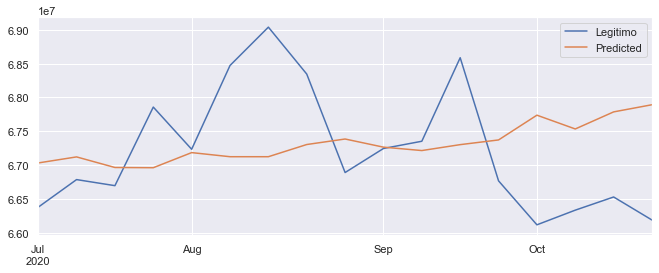

In [42]:
pd.DataFrame(test.Legitimo,columns=['Legitimo']).join(pd.DataFrame(yhat_l,columns=['Predicted'])).plot()

In [43]:
predicts = pd.concat([yhat,yhat_l], axis=1)
predicts.columns = ['Pred_Pirata','Pred_Legit']

In [123]:
predict_l = model_fit_l.get_prediction()
forecast_l = model_fit_l.get_forecast(15+26)

In [126]:
model_fit_l.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                           Legitimo   No. Observations:                  178
Model:             SARIMAX(2, 0, 3)x(2, 0, 3, 52)   Log Likelihood               -2748.289
Date:                            Thu, 19 Nov 2020   AIC                           5522.578
Time:                                    23:59:19   BIC                           5563.942
Sample:                                02-05-2017   HQIC                          5539.352
                                     - 06-28-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.263e+06      8.768   3.72e+05      0.000    3.26e+06    3.26e+06
drift       8269.0252   3606.758      2.293      0.022    1199.909    1.53e+04
ar.L1          1.3325      0.290      4.596      0.000       0.764       1.901
ar.L2         -0.3675      0.294     -1.251      0.211      -0.943       0.208
ma.L1         -0.6845      0.285     -2.403      0.016      -1.243      -0.126
ma.L2          0.1585      0.151      1.051      0.293      -0.137       0.454
ma.L3         -0.0516      0.081     -0.634      0.526      -0.211       0.108
ar.S.L52      -0.1263      0.700     -0.180      0.857      -1.499       1.246
ar.S.L104     -0.9771      0.645     -1.516      0.130      -2.240       0.286
ma.S.L52       0.2057      0.698      0.295      0.768      -1.162       1.573
ma.S.L104      0.9925      0.576      1.723      0.085      -0.137       2.122
ma.S.L156      0.0775      0.733      0.106      0.916      -1.360       1.515
sigma2      1.631e+12   8.58e-07    1.9e+18      0.000    1.63e+12    1.63e+12
===================================================================================
Ljung-Box (Q):                       57.77   Jarque-Bera (JB):                38.95
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               4.43   Skew:                             0.64
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 6.22e+34. Standard errors may be unstable.
"""

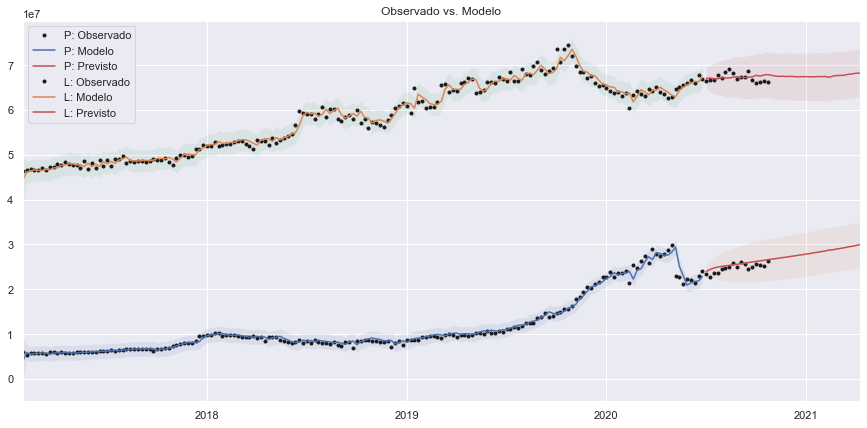

In [132]:
fig, ax = plt.subplots(figsize=(15,7))

totals.Pirataria.plot(ax=ax, style='k.',label='P: Observado')
predict.predicted_mean.plot(ax=ax, label='P: Modelo')
predict_ci = predict.summary_frame(alpha=0.05)
ax.fill_between(predict_ci.index, predict_ci['mean_ci_lower'], predict_ci['mean_ci_upper'], alpha=0.1)

forecast.predicted_mean.plot(ax=ax, style='r', label='P: Previsto')
frame = forecast.summary_frame(alpha=0.05)
ax.fill_between(frame.index,frame['mean_ci_lower'],frame['mean_ci_upper'], alpha=0.1)

totals.Legitimo.plot(ax=ax, style='k.',label='L: Observado')
predict_l.predicted_mean.plot(ax=ax, label='L: Modelo')
predict_ci_l = predict_l.summary_frame(alpha=0.05)
ax.fill_between(predict_ci_l.index, predict_ci_l['mean_ci_lower'], predict_ci_l['mean_ci_upper'], alpha=0.1)

forecast_l.predicted_mean.plot(ax=ax, style='r', label='L: Previsto')
frame_l = forecast_l.summary_frame(alpha=0.05)
ax.fill_between(frame_l.index,frame_l['mean_ci_lower'],frame_l['mean_ci_upper'], alpha=0.1)

# Cleanup the image
legend = ax.legend(loc='upper left')
title = ax.set_title('Observado vs. Modelo')

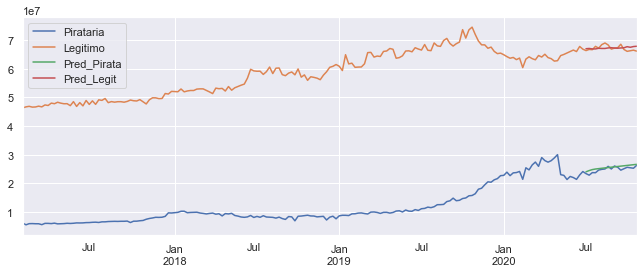

In [44]:
totals.join(predicts).plot()
plt.show()